# Modulo Pandas 

## Ejercicios

**Mail para consultas:** damiansilva14@hotmail.com\
Notas de clase inspiradas en las clases de la Universidad de Alicante

### Importamos las librerias 

In [17]:
import pandas as pd
import numpy as np

### Ejercicio 1

In [18]:
data = pd.read_csv("imports-85.data",na_values='?', header=None)
data.columns = ['Symboling','Normalized-losses','make','fuel-type','aspiration','num-of-doors','body-style',
                'drive-wheels','drive-wheels','engine-location','length','width','height','curb-weigth','engine-type',
                'num-of-cylinders','engine-size','fuel-system','bore','stroke','compression-ratio','horsepower','peak-rpm',
                'city-mpg','highway-mpg','price']

In [19]:
# comprobamos que es un dataframe
type(data)    

pandas.core.frame.DataFrame

In [20]:
# comprobamos la tipología de las variables
data.dtypes

Symboling              int64
Normalized-losses    float64
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
drive-wheels          object
engine-location      float64
length               float64
width                float64
height               float64
curb-weigth            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                 float64
stroke               float64
compression-ratio    float64
horsepower           float64
peak-rpm             float64
city-mpg               int64
highway-mpg            int64
price                float64
dtype: object

**Revisamos la dimensionalidad del DataFrame**

In [21]:
data.shape


(205, 26)

**Comprueba si tiene datos faltantes y trátalos de la manera que creas más conveniente**

In [22]:
data.isnull().sum()


Symboling             0
Normalized-losses    41
make                  0
fuel-type             0
aspiration            0
num-of-doors          2
body-style            0
drive-wheels          0
drive-wheels          0
engine-location       0
length                0
width                 0
height                0
curb-weigth           0
engine-type           0
num-of-cylinders      0
engine-size           0
fuel-system           0
bore                  4
stroke                4
compression-ratio     0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 4
dtype: int64

* Normalized-losses

Puesto que la variable 'Normalized-losses' es continua, una opción para tratar los missing values es la media de dicha variable.

In [23]:
# Estandarizamos los "missing values"
x = np.mean(data['Normalized-losses'])
# Completamos los valores incompletos de nuestra base de datos, con los valores calculados
data['Normalized-losses'] = data['Normalized-losses'].fillna(x)


* num-of-doors

In [25]:
data['num-of-doors'].unique()

array(['two', 'four', nan], dtype=object)

In [26]:
# pasar de variable categórica a numérica
categ = {"num-of-doors": {"two": 2, "four": 4}}
data.replace(categ, inplace=True)


In [27]:
# comprobamos su cambio
data['num-of-doors'].head(5)

0    2.0
1    2.0
2    2.0
3    4.0
4    4.0
Name: num-of-doors, dtype: float64

In [28]:
# lo reemplazamos por la media
x = np.mean(data['num-of-doors'])
x = int(x)
data['num-of-doors'] = data['num-of-doors'].fillna(x)

* Bore / Stroke / horsepower / peak-rpm / price

In [29]:
# bore
x = np.mean(data['bore'])
data['bore'] = data['bore'].fillna(x)

In [30]:
# stroke
x = np.mean(data['stroke'])
data['stroke'] = data['stroke'].fillna(x)

In [31]:
# horsepower
x = np.mean(data['horsepower'])
data['horsepower'] = data['horsepower'].fillna(x)

In [32]:
# peak-rpm
x = np.mean(data['peak-rpm'])
data['peak-rpm'] = data['peak-rpm'].fillna(x)

In [33]:
# price
x = np.mean(data['price'])
data['price'] = data['price'].fillna(x)

Una forma más rapida y elegante de hacer esto es mediante un **``for``** loop:

In [34]:
L = ['Normalized-losses','bore','stroke','horsepower','peak-rpm','price']

for i in L:
    x = np.mean(data[i])
    data[i] = data[i].fillna(x)

Comprobamos los missings values:

In [35]:
data.isnull().sum()

Symboling            0
Normalized-losses    0
make                 0
fuel-type            0
aspiration           0
num-of-doors         0
body-style           0
drive-wheels         0
drive-wheels         0
engine-location      0
length               0
width                0
height               0
curb-weigth          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 0
stroke               0
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64

**Obtén la longitud y anchuras medias por cada categoría (“body-style”)**

In [36]:
# miramos qué categorías tiene 'body-style'
data['body-style'].unique()

array(['convertible', 'hatchback', 'sedan', 'wagon', 'hardtop'],
      dtype=object)

In [38]:
# indexamos las columnas que nos interesan, es decir tomamos una submuestra
data_aux = data.loc[:,['body-style','width','height']]

In [39]:
# agrupamos por categoría de body-style, agregando la media del resto de columnas

bybody_style = data_aux.groupby('body-style')
bybody_style.mean()

,width,height
body-style,,
convertible,65.583333,51.433333
hardtop,66.612500,52.850000
hatchback,65.247143,52.108571
sedan,66.260417,54.337500
wagon,66.256000,56.728000


**Analiza el atributo peso (“curb-weight”) y dibuja su histograma para apreciar si sigue alguna distribución concreta**

In [40]:
# para analizar una variable utilizamos la variable describe
data['curb-weigth'].describe()

count     205.000000
mean     2555.565854
std       520.680204
min      1488.000000
25%      2145.000000
50%      2414.000000
75%      2935.000000
max      4066.000000
Name: curb-weigth, dtype: float64

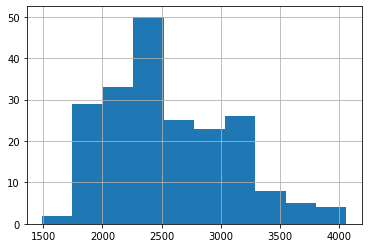

In [41]:
# dibujamos su histograma
%matplotlib inline
data['curb-weigth'].hist()

**Analiza cuál es el número de cilindros que se da con más frecuencia en el dataset**

In [42]:
# variable num-of-cylinders
data['num-of-cylinders'].unique()

array(['four', 'six', 'five', 'three', 'twelve', 'two', 'eight'],
      dtype=object)

In [43]:
# hacemos una tabla de frecuencias
pd.value_counts(data['num-of-cylinders'])

four      159
six        24
five       11
eight       5
two         4
three       1
twelve      1
Name: num-of-cylinders, dtype: int64

**Obtén una lista ordenada de las diferentes marcas de coches.**

In [44]:
# variable make
x = data['make'].unique()
x = list(x)
x.sort()
x

['alfa-romero',
 'audi',
 'bmw',
 'chevrolet',
 'dodge',
 'honda',
 'isuzu',
 'jaguar',
 'mazda',
 'mercedes-benz',
 'mercury',
 'mitsubishi',
 'nissan',
 'peugot',
 'plymouth',
 'porsche',
 'renault',
 'saab',
 'subaru',
 'toyota',
 'volkswagen',
 'volvo']

**Crear un dataframe que solo contenga la marca toyota y cuyo precio sea mayor que la media de su precio.**

In [45]:
x = data[data.make=='toyota']['price'].mean()
print('El precio medio es:',x)
data1 = data[(data.make=='toyota')&(data.price>x)]

El precio medio es: 9885.8125


In [46]:
data1.head(10)

,Symboling,Normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,drive-wheels,engine-location,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
169,2,134.0,toyota,gas,std,2.0,hatchback,rwd,front,98.4,...,146,mpfi,3.62,3.50,9.3,116.0,4800.0,24,30,9989.0
170,2,134.0,toyota,gas,std,2.0,hardtop,rwd,front,98.4,...,146,mpfi,3.62,3.50,9.3,116.0,4800.0,24,30,11199.0
171,2,134.0,toyota,gas,std,2.0,hatchback,rwd,front,98.4,...,146,mpfi,3.62,3.50,9.3,116.0,4800.0,24,30,11549.0
172,2,134.0,toyota,gas,std,2.0,convertible,rwd,front,98.4,...,146,mpfi,3.62,3.50,9.3,116.0,4800.0,24,30,17669.0
174,-1,65.0,toyota,diesel,turbo,4.0,sedan,fwd,front,102.4,...,110,idi,3.27,3.35,22.5,73.0,4500.0,30,33,10698.0
175,-1,65.0,toyota,gas,std,4.0,hatchback,fwd,front,102.4,...,122,mpfi,3.31,3.54,8.7,92.0,4200.0,27,32,9988.0
176,-1,65.0,toyota,gas,std,4.0,sedan,fwd,front,102.4,...,122,mpfi,3.31,3.54,8.7,92.0,4200.0,27,32,10898.0
177,-1,65.0,toyota,gas,std,4.0,hatchback,fwd,front,102.4,...,122,mpfi,3.31,3.54,8.7,92.0,4200.0,27,32,11248.0
178,3,197.0,toyota,gas,std,2.0,hatchback,rwd,front,102.9,...,171,mpfi,3.27,3.35,9.3,161.0,5200.0,20,24,16558.0
179,3,197.0,toyota,gas,std,2.0,hatchback,rwd,front,102.9,...,171,mpfi,3.27,3.35,9.3,161.0,5200.0,19,24,15998.0


**¿Qué son más caros los coches de gas o de diesel? Dibuja un boxplot**

In [47]:
data_aux = data.loc[:,['fuel-type','price']]

In [48]:
data_aux.groupby('fuel-type').mean()

,price
fuel-type,
diesel,15838.150000
gas,12922.694689


**Gracias a esta manipulación de datos, observamos que los coches que utilizan diesel son los más caros**

diesel         AxesSubplot(0.1,0.15;0.363636x0.75)
gas       AxesSubplot(0.536364,0.15;0.363636x0.75)
dtype: object

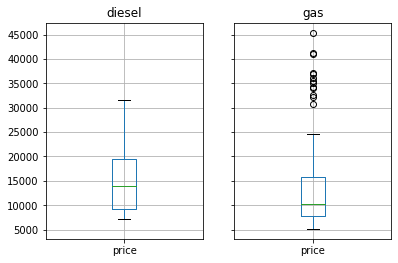

In [49]:
byfueltype = data.groupby("fuel-type")
byfueltype.boxplot(column="price")

**Elimina la columna symboling del dataframe**

In [50]:
data = data.drop(labels = 'Symboling', axis = 1)

**Sacar la matriz de correlaciones**

In [51]:
correlaciones = data.corr()
correlaciones

,Normalized-losses,num-of-doors,engine-location,length,width,height,curb-weigth,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
Normalized-losses,1.000000,-0.362587,-0.056518,0.019209,0.084195,-0.370706,0.097785,0.110997,-0.029266,0.054929,-0.114525,0.203434,0.237748,-0.218749,-0.178221,0.133999
num-of-doors,-0.362587,1.000000,0.445395,0.392329,0.201970,0.545034,0.195968,0.017992,0.113292,-0.011167,0.159953,-0.123335,-0.240148,-0.021561,-0.045139,0.046545
engine-location,-0.056518,0.445395,1.000000,0.874587,0.795144,0.589435,0.776386,0.569329,0.488760,0.160944,0.249786,0.351957,-0.360704,-0.470414,-0.544082,0.583168
length,0.019209,0.392329,0.874587,1.000000,0.841118,0.491029,0.877728,0.683360,0.606462,0.129522,0.158414,0.554434,-0.287031,-0.670909,-0.704662,0.682986
width,0.084195,0.201970,0.795144,0.841118,1.000000,0.279210,0.867032,0.735433,0.559152,0.182939,0.181129,0.642195,-0.219859,-0.642704,-0.677218,0.728699
height,-0.370706,0.545034,0.589435,0.491029,0.279210,1.000000,0.295572,0.067149,0.171101,-0.055351,0.261214,-0.110137,-0.320602,-0.048640,-0.107358,0.134388
curb-weigth,0.097785,0.195968,0.776386,0.877728,0.867032,0.295572,1.000000,0.850594,0.648485,0.168783,0.151362,0.750968,-0.266283,-0.757414,-0.797465,0.820825
engine-size,0.110997,0.017992,0.569329,0.683360,0.735433,0.067149,0.850594,1.000000,0.583798,0.203094,0.028971,0.810713,-0.244599,-0.653658,-0.677470,0.861752
bore,-0.029266,0.113292,0.488760,0.606462,0.559152,0.171101,0.648485,0.583798,1.000000,-0.055909,0.005201,0.575737,-0.254761,-0.584508,-0.586992,0.532300
stroke,0.054929,-0.011167,0.160944,0.129522,0.182939,-0.055351,0.168783,0.203094,-0.055909,1.000000,0.186105,0.088264,-0.066844,-0.042179,-0.043961,0.082095


**¿Qué variables están más correlacionadas (ordenadas de mayor a menor) con la variable precio?**

In [52]:
correlaciones['price'].sort_values(ascending = False)

price                1.000000
engine-size          0.861752
curb-weigth          0.820825
horsepower           0.757917
width                0.728699
length               0.682986
engine-location      0.583168
bore                 0.532300
height               0.134388
Normalized-losses    0.133999
stroke               0.082095
compression-ratio    0.070990
num-of-doors         0.046545
peak-rpm            -0.100854
city-mpg            -0.667449
highway-mpg         -0.690526
Name: price, dtype: float64

**Crear una tabla agrupados por marca y dentro de la misma agrupados por el numero de puertas cuyas columnas sean body-style y horsepower**

In [53]:
data_aux = data.loc[:,['body-style','make','num-of-doors','horsepower']]
bymake = data_aux.set_index(["make", "num-of-doors"])
bymake

body-style  horsepower
make        num-of-doors                         
alfa-romero 2.0           convertible       111.0
            2.0           convertible       111.0
            2.0             hatchback       154.0
audi        4.0                 sedan       102.0
            4.0                 sedan       115.0
...                               ...         ...
volvo       4.0                 sedan       114.0
            4.0                 sedan       160.0
            4.0                 sedan       134.0
            4.0                 sedan       106.0
            4.0                 sedan       114.0

[205 rows x 2 columns]

**Crear una nueva columna siendo la relación entre 'horsepower' y 'compression-ratio'**

In [54]:
data['nueva variable'] = data['horsepower']/data['compression-ratio']

In [55]:
data['nueva variable'].head(20)

0     12.333333
1     12.333333
2     17.111111
3     10.200000
4     14.375000
5     12.941176
6     12.941176
7     12.941176
8     16.867470
9     22.857143
10    11.477273
11    11.477273
12    13.444444
13    13.444444
14    13.444444
15    22.750000
16    22.750000
17    22.750000
18     5.052632
19     7.291667
Name: nueva variable, dtype: float64